# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [328]:
import requests
import pandas as pd
import numpy as np
import tweepy
%matplotlib inline
import matplotlib.pyplot as plt

In [329]:
twitter_arc = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [331]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t', engine='python')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [332]:
import json
with open('tweet-json.txt', encoding='utf-8') as file:
    data = file.readlines()

df_list = []
for d in data:
    i = json.loads(d)['id']
    fa = json.loads(d)['favorite_count']
    re = json.loads(d)['retweet_count']
    df_list.append({'tweet_id':i, 'favourite_count':fa, 'retweet_count':re})

twitter_add_data = pd.DataFrame(df_list, columns=['tweet_id','favourite_count','retweet_count']) 

In [333]:
twitter_add_data

,tweet_id,favourite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [334]:
twitter_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [335]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [336]:
twitter_arc.text.sample(5)

2164    This is Oliviér. He's a Baptist Hindquarter. A...
768     This is Derek. You can't look at him and not s...
1050    Meet Kayla, an underground poker legend. Playe...
492     Here is Atlas. He went all out this year. 13/1...
2019    This is just impressive I have nothing else to...
Name: text, dtype: object

In [337]:
# from sample() method, notice a problem with row index 290
twitter_arc.iloc[290][['text', 'rating_numerator']]

text                @markhoppus 182/10
rating_numerator                   182
Name: 290, dtype: object

In [338]:
#some ratings seems out of bound 
twitter_arc.rating_numerator.sort_values().tail(30)

866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, dtype: int64

In [339]:
twitter_arc.iloc[979][['text', 'rating_numerator']].text

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [340]:
twitter_arc.iloc[1634][['text', 'rating_numerator']].text

'Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3'

In [341]:
twitter_arc.iloc[55][['text', 'rating_numerator']].text

'@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s'

In [342]:
twitter_arc.iloc[516][['text', 'rating_numerator']].text

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [343]:
twitter_arc.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [344]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [345]:
image_predictions.info()
# no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [346]:
# check if all predicted dog breeds are wrong
image_predictions[image_predictions.p1_dog == False][image_predictions.p2_dog == False][image_predictions.p3_dog == False]

C:\Users\pc\AppData\Local\Temp\ipykernel_7924\1322933797.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  image_predictions[image_predictions.p1_dog == False][image_predictions.p2_dog == False][image_predictions.p3_dog == False]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [347]:
twitter_add_data

,tweet_id,favourite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [348]:
twitter_add_data.info() # no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   favourite_count  2354 non-null   int64
 2   retweet_count    2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
##### twitter_arc table
1. timestamp datatype is object and year column is not available

2. some of the rows are retweet 

3. some of the rows are reply

4. some rating_numerators and their datatype are incorrect 

5. some dog names are invalid

6. some columns are unneccessary to the discussion

7. some numerator_ratings contains no images

##### image_predictions table
8. some predicted dog_breeds are wrong and No dog_breed column

9. some columns are unneccessary to the discussion

### Tidiness issues

###### twitter_arc table and twitter_add_data tables

1. dog stage variable is in 4 columns

2. the two tables contains similar observations

3. master table for visualization

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [349]:
# Make copies of original pieces of data
twitter_arc_cleaned = twitter_arc.copy()
img_predictions_cleaned = image_predictions.copy()
twitter_add_data_cleaned = twitter_add_data.copy()

### Issue #1: timestamp datatype is object and year column is not available

#### Define: convert timestamp to datetime and create year column from timestamp column

#### Code

In [350]:
twitter_arc_cleaned.timestamp = pd.to_datetime(twitter_arc_cleaned.timestamp)
twitter_arc_cleaned['year'] = twitter_arc_cleaned.timestamp.dt.year

#### Test

In [351]:
twitter_arc_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: some of the rows are retweet

#### Define: drop rows that are retweet

#### Code

In [352]:
retweet_list = [ r for r in twitter_arc_cleaned[twitter_arc_cleaned.retweeted_status_id.isnull() == False].index]
twitter_arc_cleaned = twitter_arc_cleaned.drop(retweet_list, axis=0)

#### Test

In [353]:
twitter_arc_cleaned.info() #retweet_status_id now have 0 non-null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### Issue #3: some of the rows are reply

#### Define: drop rows that are reply

#### Code

In [354]:
reply_list = [ r for r in twitter_arc_cleaned[twitter_arc_cleaned.in_reply_to_status_id.isnull() == False].index]
twitter_arc_cleaned = twitter_arc_cleaned.drop(reply_list, axis=0)

#### Test

In [355]:
twitter_arc_cleaned.info() #in_reply_to_status_id now have 0 non-null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### Issue #4: some rating_numerators are incorrect

#### Define: re-extract rating_numerators 

#### Code

In [356]:
twitter_arc_cleaned.rating_numerator = twitter_arc_cleaned.text.str.extract(r"(\d+(\.\d+)?\/\d+)")[0].str.extract(r"(\d+(\.\d+)?)")[0]
twitter_arc_cleaned.rating_numerator = twitter_arc_cleaned.rating_numerator.astype('float')

#### Test

In [385]:
print(twitter_arc_cleaned.rating_numerator[45])
print()
twitter_arc_cleaned.info()

13.5

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   float64   

### Issue #5: some dog names are invalid

#### Define: clean dog names

#### Code

In [386]:
''' I tried to re-extract the names but ended up extracting wrong names for rows with invalid 
names. Thus, i decided to set all the invalid names to None to be on a safer side. If you wish
to verify this, please uncomment the codes below'''
#twitter_arc_cleaned = twitter_arc_cleaned.reset_index().drop('index', axis=1)
#twitter_arc_cleaned.name = twitter_arc_cleaned.text.str.extract(r'\S*\s([A-Z][a-z]+)')[0]
#twitter_arc_cleaned.name

' I tried to re-extract the names but ended up extracting wrong names for rows with invalid \nnames. Thus, i decided to set all the invalid names to None to be on a safer side. If you wish\nto verify this, please uncomment the codes below'

In [387]:
name_list = []
for n in twitter_arc_cleaned.name:
    if n[0].islower() == False:
        name_list.append(n)
    else:
        name_list.append('None')
twitter_arc_cleaned.name = name_list

#### Test

In [388]:
twitter_arc_cleaned[twitter_arc_cleaned.name.str.contains(r'\b[a-z]+')==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year


### Tidiness Issue #1: dog stage variable is in 4 columns

#### Define: merge the 4 columns into a new column dog_stage

#### Code

In [389]:
twitter_arc_cleaned = twitter_arc_cleaned.reset_index().drop('index', axis=1)
dog_stage_list = []
for i in twitter_arc_cleaned.index:
    if twitter_arc_cleaned.iloc[i].doggo == 'doogo':
        dog_stage_list.append('doogo')
    elif twitter_arc_cleaned.iloc[i].floofer == 'floofer':
        dog_stage_list.append('floofer')
    elif twitter_arc_cleaned.iloc[i].pupper == 'pupper':
        dog_stage_list.append('pupper')
    elif twitter_arc_cleaned.iloc[i].puppo == 'puppo':
        dog_stage_list.append('puppo')
    else:
        dog_stage_list.append('None')

In [390]:
twitter_arc_cleaned['dog_stage'] = dog_stage_list

#### Test

In [391]:
twitter_arc_cleaned.dog_stage.value_counts()

None       1833
pupper      230
puppo        24
floofer      10
Name: dog_stage, dtype: int64

### Issue #6: some columns are unneccessary to the discussion

#### Define: drop all other columns irrelevant to the discussion

#### Code

In [ ]:
twitter_arc_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id','source', 'text', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls','doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [ ]:
twitter_arc_cleaned.columns

### Issue #8: some predicted dog_breeds are wrong

#### Define: drop rows with wrong predicted dog_breeds

#### Code

In [366]:
index_list = [i for i in img_predictions_cleaned[img_predictions_cleaned.p1_dog == False][img_predictions_cleaned.p2_dog == False][img_predictions_cleaned.p3_dog == False].index]
img_predictions_cleaned = img_predictions_cleaned.drop(index_list, axis=0)

C:\Users\pc\AppData\Local\Temp\ipykernel_7924\1092486886.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index_list = [i for i in img_predictions_cleaned[img_predictions_cleaned.p1_dog == False][img_predictions_cleaned.p2_dog == False][img_predictions_cleaned.p3_dog == False].index]


#### Test

In [367]:
img_predictions_cleaned[img_predictions_cleaned.p1_dog == False][img_predictions_cleaned.p2_dog == False][img_predictions_cleaned.p3_dog == False]

C:\Users\pc\AppData\Local\Temp\ipykernel_7924\881229915.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  img_predictions_cleaned[img_predictions_cleaned.p1_dog == False][img_predictions_cleaned.p2_dog == False][img_predictions_cleaned.p3_dog == False]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #8 con't: no dog_breed column

#### Define: combine all dog_breeds into a created dog_breed column

#### Code

In [368]:
# reset index to avoid error in subsequent code
img_predictions_cleaned = img_predictions_cleaned.reset_index()
img_predictions_cleaned.drop('index', axis=1, inplace=True)

In [369]:
ip_list = []
for i in img_predictions_cleaned.index:
    if img_predictions_cleaned.iloc[i].p1_dog == True:
        ip_list.append(img_predictions_cleaned.iloc[i].p1)
    elif img_predictions_cleaned.iloc[i].p2_dog == True:
        ip_list.append(img_predictions_cleaned.iloc[i].p2)
    else:
        ip_list.append(img_predictions_cleaned.iloc[i].p3)

In [370]:
img_predictions_cleaned['dog_breed'] = ip_list 

#### Test

In [371]:
img_predictions_cleaned.dog_breed

0         Welsh_springer_spaniel
1                        redbone
2                German_shepherd
3            Rhodesian_ridgeback
4             miniature_pinscher
                  ...           
1746    Chesapeake_Bay_retriever
1747                      basset
1748          Labrador_retriever
1749                   Chihuahua
1750                   Chihuahua
Name: dog_breed, Length: 1751, dtype: object

### Issue #9: some columns are unneccessary to the discussion

#### Define: drop columns that are not needed

#### Code 

In [372]:
img_predictions_cleaned = img_predictions_cleaned.drop(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

#### Test

In [373]:
img_predictions_cleaned

,tweet_id,dog_breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher
...,...,...
1746,891087950875897856,Chesapeake_Bay_retriever
1747,891327558926688256,basset
1748,891689557279858688,Labrador_retriever
1749,891815181378084864,Chihuahua


### Tidiness Issue #2: twitter_arc_cleaned and twitter_add_data_cleaned tables contain similar observations

#### Define: merge twitter_arc_cleaned and twitter_add_data_cleaned tables

#### Code

In [374]:
twitter_arc_combined = pd.merge(twitter_arc_cleaned, twitter_add_data_cleaned, how='inner', on='tweet_id')
twitter_arc_combined.to_csv('twitter_arc_combined.csv', index=False) #store it

#### Test

In [375]:
twitter_arc_combined

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,favourite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,2017,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,2017,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,2017,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,2017,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,2017,41048,9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5.0,10,None,None,None,None,None,2015,111,41
2093,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6.0,10,None,None,None,None,None,2015,311,147
2094,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9.0,10,None,None,None,None,None,2015,128,47
2095,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7.0,10,None,None,None,None,None,2015,132,48


### Issue #6: some numerator_ratings contain no images
### Tidiness issue #3 : master table for visualization

#### Define: Create a master table for visualization and in the process drop numerator_ratings that contain no images 

#### code

In [376]:
twitter_archive_master = pd.merge(img_predictions_cleaned, twitter_arc_combined, how='left', on='tweet_id')

#### Test

In [377]:
twitter_archive_master

,tweet_id,dog_breed,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,favourite_count,retweet_count
0,666020888022790149,Welsh_springer_spaniel,NaN,NaN,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,...,8.0,10.0,None,None,None,None,None,2015.0,2535.0,532.0
1,666029285002620928,redbone,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,...,7.0,10.0,None,None,None,None,None,2015.0,132.0,48.0
2,666033412701032449,German_shepherd,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,...,9.0,10.0,None,None,None,None,None,2015.0,128.0,47.0
3,666044226329800704,Rhodesian_ridgeback,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,...,6.0,10.0,None,None,None,None,None,2015.0,311.0,147.0
4,666049248165822465,miniature_pinscher,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,...,5.0,10.0,None,None,None,None,None,2015.0,111.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,891087950875897856,Chesapeake_Bay_retriever,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,...,13.0,10.0,None,None,None,None,None,2017.0,20562.0,3261.0
1747,891327558926688256,basset,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,...,12.0,10.0,Franklin,None,None,None,None,2017.0,41048.0,9774.0
1748,891689557279858688,Labrador_retriever,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,...,13.0,10.0,Darla,None,None,None,None,2017.0,42908.0,8964.0
1749,891815181378084864,Chihuahua,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,...,12.0,10.0,Archie,None,None,None,None,2017.0,25461.0,4328.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [378]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### What are the top ten most common dog breeds?

In [379]:
twitter_archive_master.dog_breed.value_counts()[:10]

golden_retriever      173
Labrador_retriever    113
Pembroke               96
Chihuahua              95
pug                    65
toy_poodle             52
chow                   51
Samoyed                46
Pomeranian             42
cocker_spaniel         34
Name: dog_breed, dtype: int64

#### What are the five dog breeds with the highest average ratings?

In [380]:
twitter_archive_master.groupby('dog_breed').mean().rating_numerator.sort_values(ascending=False)[:5]

dog_breed
soft-coated_wheaten_terrier    21.357143
West_Highland_white_terrier    14.687500
Great_Pyrenees                 14.666667
chow                           14.166667
Labrador_retriever             13.688679
Name: rating_numerator, dtype: float64

#### Which dog breed has the single most likes?

In [381]:
twitter_archive_master[twitter_archive_master.favourite_count == twitter_archive_master.favourite_count.max()].dog_breed

1459    Lakeland_terrier
Name: dog_breed, dtype: object

#### What are the top 3 most liked dog breeds as a whole?

In [382]:
twitter_archive_master.groupby('dog_breed').sum().favourite_count.sort_values(ascending=False)[:3]

dog_breed
golden_retriever      1943782.0
Labrador_retriever    1265355.0
Pembroke              1038797.0
Name: favourite_count, dtype: float64

### Insights:
1. golden_retriever which appears 173 times is the most common dog breed in the space

2. clumber has the highest average rating of 27/10 in the twitter space

3. A dog_breed known as Lakeland_terrier has the single most likes

4. Golden_retriever, Labrador_retriever, and Pembroke received the most love (likes) with 1.94 million, 1.27 million, and 1.39 million counts respectively.

### Visualization

#### which year did the most retweet occur?

In [383]:
heights = [h/1000000 for h in twitter_archive_master.groupby('year').sum().retweet_count]
years =[y for y in twitter_archive_master.groupby('year').sum().retweet_count.index] 
title = 'Retweets Per Year'
ylabel = 'Number of retweets in Millions'
xlabel = 'Years'
print(heights, years)


[0.563057, 2.248758, 1.910345] [2015.0, 2016.0, 2017.0]


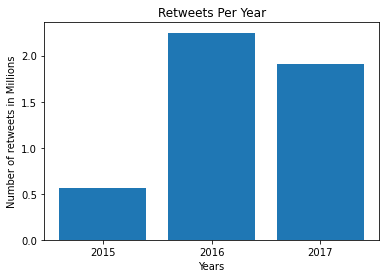

In [384]:
plt.bar(years, heights)
plt.xticks(years,['2015', '2016', '2017'])
plt.ylabel(ylabel)
plt.xlabel(xlabel)
_=plt.title(title)